In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Check the total number of tweets for each day, overlay with bitcoin closing price

In [31]:
#load bitcoin pricing information
price = pd.read_csv('../data/external/BTC_USD_2020-10-10_2021-10-09-CoinDesk.csv')
btcpdata = price[['Date', 'Closing Price (USD)']]
btcpdata["BTCdateTime"] = pd.to_datetime(btcpdata["Date"], format="%Y-%m-%d", errors='coerce')
btcpdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 365 non-null    object        
 1   Closing Price (USD)  365 non-null    float64       
 2   BTCdateTime          365 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 8.7+ KB


/var/folders/qj/zhs6m1zd0dvg_v7rtzjt38n80000gn/T/ipykernel_22781/2269949021.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btcpdata["BTCdateTime"] = pd.to_datetime(btcpdata["Date"], format="%Y-%m-%d", errors='coerce')


In [32]:
#load S&P 500 pricing information
price = pd.read_csv('../data/external/INDEX_US_S&P US_SPX.csv')
sppdata = price[['Date', 'Close']]
sppdata["SPdateTime"] = pd.to_datetime(sppdata["Date"], format="%m/%d/%Y", errors='coerce')
sppdata['Date'] = sppdata['SPdateTime'].dt.strftime('%Y-%m-%d')
sppdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        220 non-null    object        
 1   Close       220 non-null    object        
 2   SPdateTime  220 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 5.3+ KB


/var/folders/qj/zhs6m1zd0dvg_v7rtzjt38n80000gn/T/ipykernel_22781/1535943453.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sppdata["SPdateTime"] = pd.to_datetime(sppdata["Date"], format="%m/%d/%Y", errors='coerce')
/var/folders/qj/zhs6m1zd0dvg_v7rtzjt38n80000gn/T/ipykernel_22781/1535943453.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sppdata['Date'] = sppdata['SPdateTime'].dt.strftime('%Y-%m-%d')


In [65]:
#merge two dfs by date


merged_df1 = pd.merge(left=btcpdata, right=sppdata, left_on='Date', right_on='Date')
merged_df1 = merged_df1.rename(columns={'Close': 'S&P 500 (USD)', 'Closing Price (USD)': 'Bitcoin (USD)'})
merged_df1['S&P 500 (USD)'] =  merged_df1['S&P 500 (USD)'].apply(lambda x: x.replace(",", ""))
merged_df1 = merged_df1.astype({"S&P 500 (USD)": "float",
                                "Bitcoin (USD)": "float"}) 


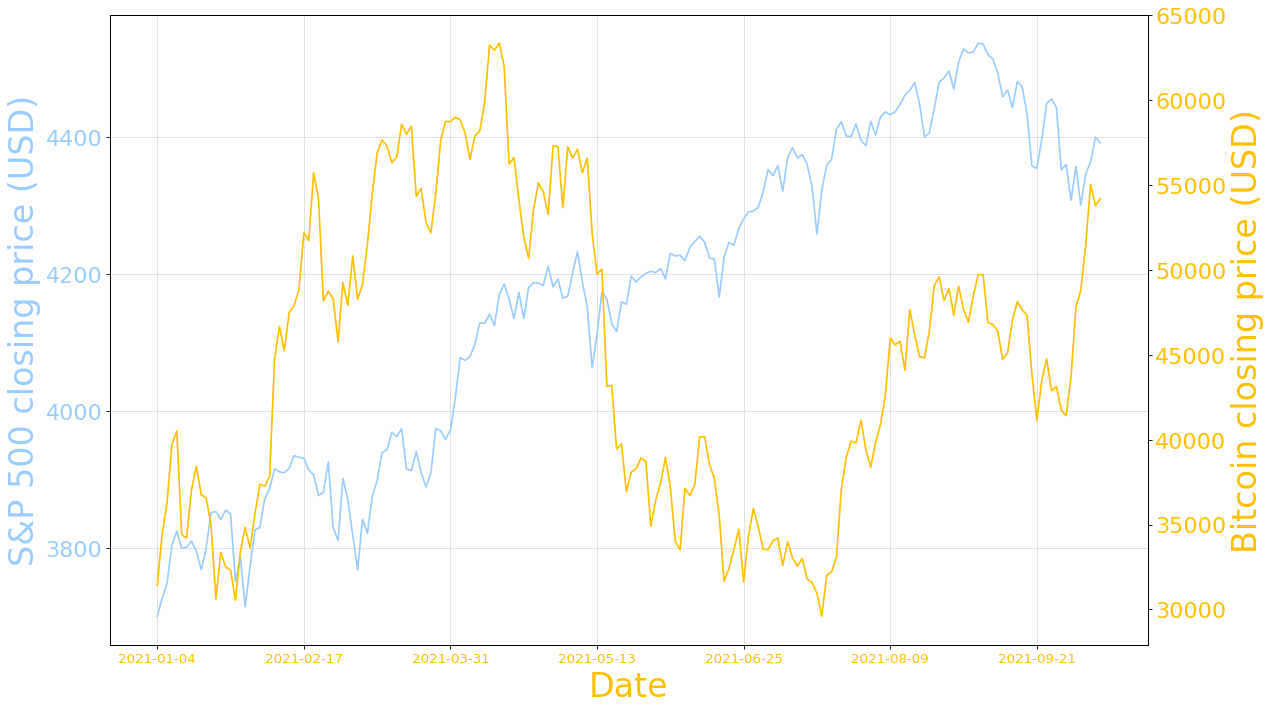

In [72]:
x = merged_df1['Date']
y1 = merged_df1['S&P 500 (USD)']
y2 = merged_df1['Bitcoin (USD)']

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(x, y1, color='#99CCFF')


# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='#FFC000')

# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Date', fontsize=30, color='#FFC000')
ax1.tick_params(axis='x', rotation=0, labelsize=12, labelcolor='#FFC000')
ax1.set_ylabel('S&P 500 closing price (USD)', color='#99CCFF', fontsize=30)
ax1.tick_params(axis='y', rotation=0, labelcolor='#99CCFF', labelsize=20 )
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("Bitcoin closing price (USD)", color='#FFC000', fontsize=30)
ax2.tick_params(axis='y', labelcolor='#FFC000', labelsize=20)
ax2.set_xticks(np.arange(0, len(x), 30)) #change this number to change the number of labels
ax2.set_xticklabels(x[::30], rotation=90, fontdict={'fontsize':10}) #change this number to change the number of labels
#ax2.set_title("Personal Savings Rate vs Unemployed: Plotting in Secondary Y Axis", fontsize=22)
fig.tight_layout()
plt.show()




Randomly select rows from each day

In [ ]:
#btcdata.groupby(btcdata['date_time'].dt.year).apply(lambda x :x.iloc[random.choice(range(0,len(x)))])
#btcdata.groupby(btcdata['date_time'].dt.year).apply(lambda x: x.sample(2)).reset_index(drop=True)

selected = data.groupby(data['dateTime'].dt.day).apply(lambda x: x.sample(10, random_state=889))

selected.to_csv('sample_bitcoin_tweets_ten_each_day.csv')
selected